In [1]:
import tensorflow_hub as hub
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [2]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [3]:
def load_image(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = img[tf.newaxis, :]
    return img

def view_image(image):
    plt.imshow(np.squeeze(image))
    plt.show()
    
def plot_image_array(image_array):
    # Create figure with sub-plots.
    n=len(image_array)
    fig, axes = plt.subplots(1, n, figsize=(30, 10))
    # Adjust vertical spacing.
    fig.subplots_adjust(hspace=0.1, wspace=0.1)

    for i in range(n):
        ax = axes.flat[i]
        ax.imshow(np.squeeze(image_array[i]))
    plt.show()

In [4]:
content_image = load_image('input_images/Green_Sea_Turtle_grazing_seagrass.jpg')
style_image = load_image('style_images/The_Great_Wave_off_Kanagawa.jpg')

array_img = [content_image,style_image]

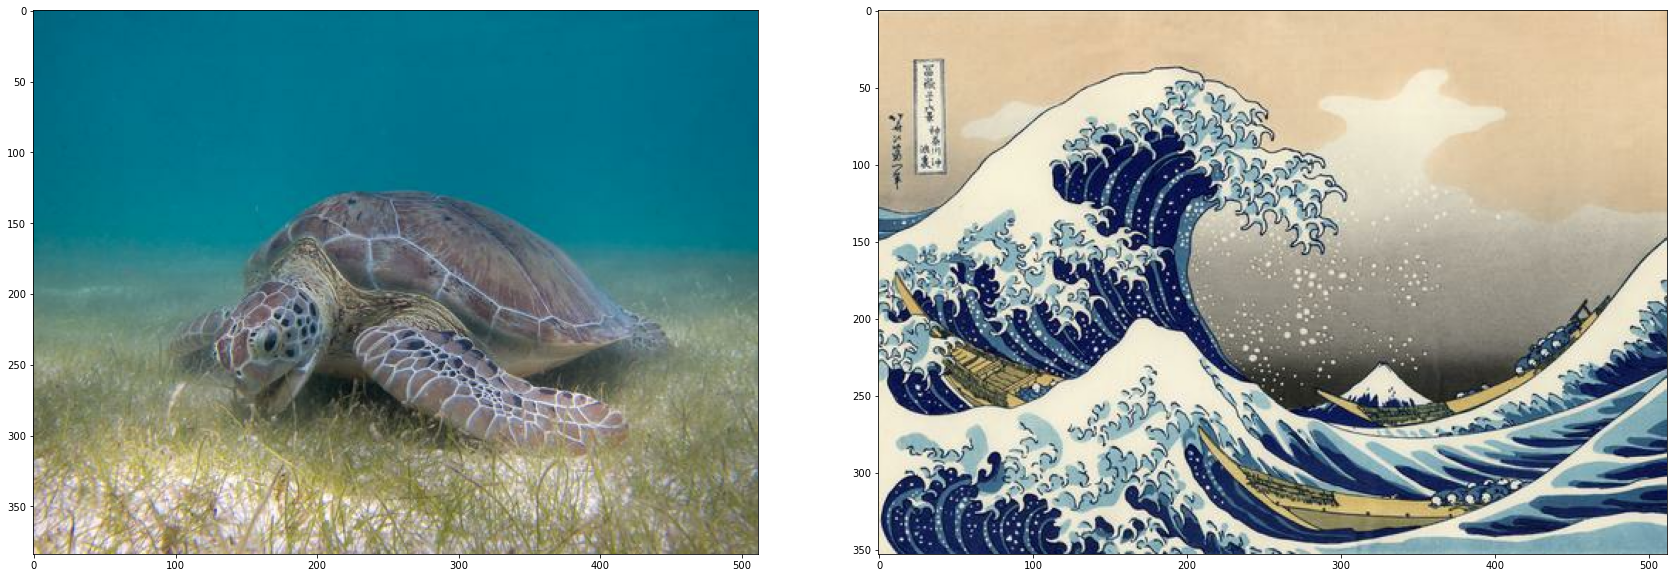

In [5]:
plot_image_array(array_img)

In [6]:
stylized_image = model(tf.constant(content_image), tf.constant(style_image))[0]
array_img.append(stylized_image)

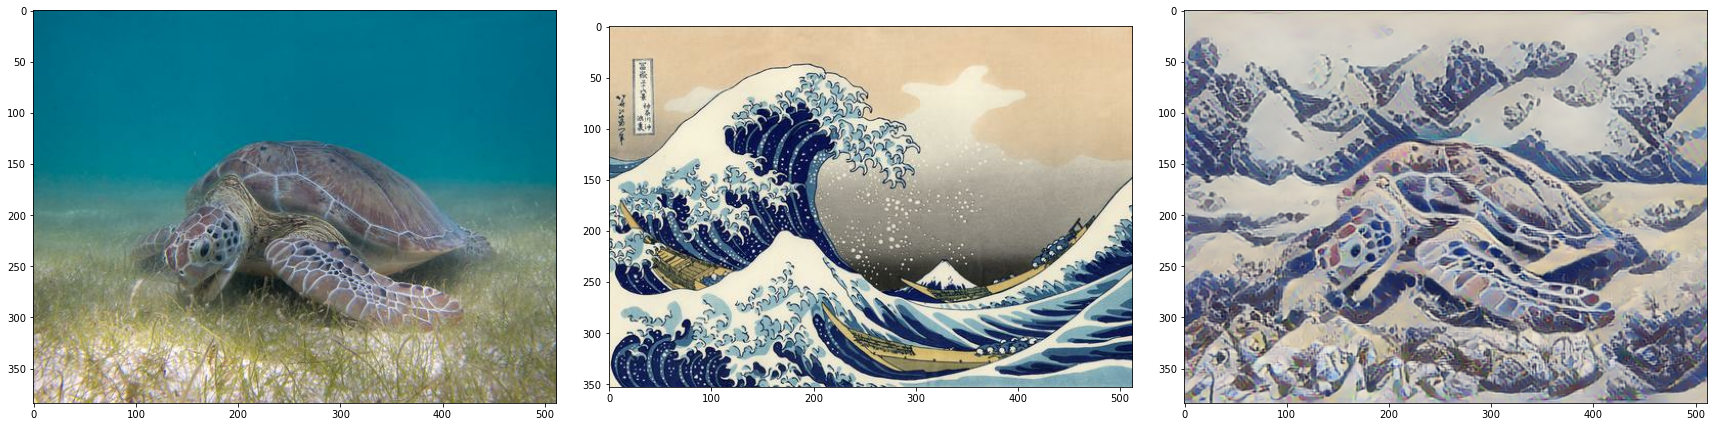

In [7]:
plot_image_array(array_img)

In [8]:
cv2.imwrite('output_images/generated_img.jpg', cv2.cvtColor(np.squeeze(stylized_image)*255, cv2.COLOR_BGR2RGB))

True